In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
data=pd.read_csv('AirPassengers 2.xls')
data.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [3]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [4]:
data.shape

(144, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Text(0.5, 1.0, 'Number of Passengers according to Months')

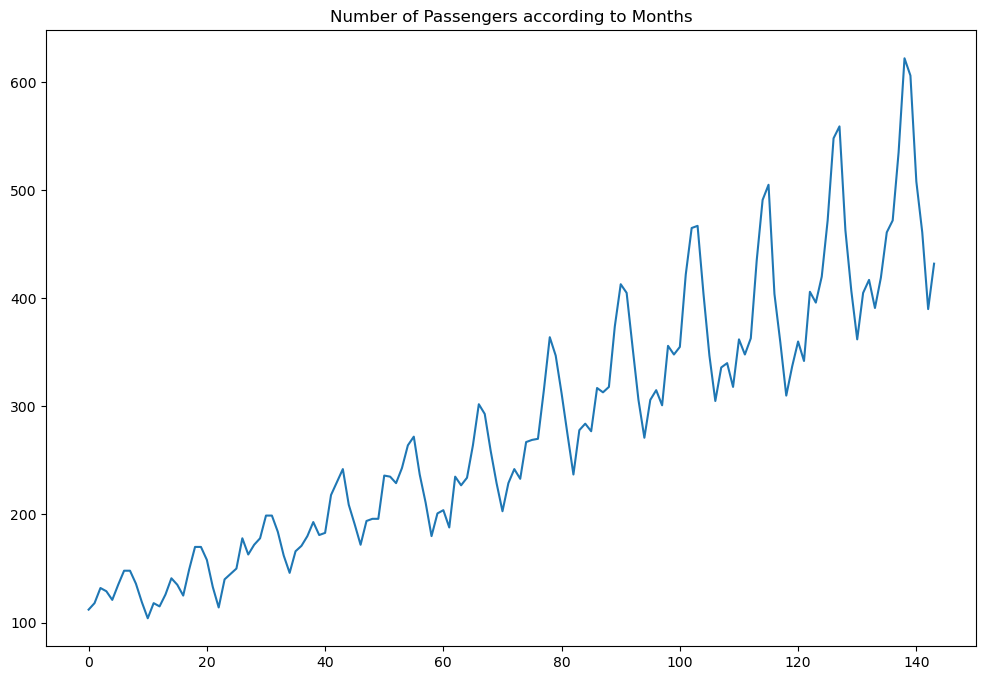

In [6]:
plt.figure(figsize=(12,8))
plt.plot(data['#Passengers'])
plt.title("Number of Passengers according to Months")

In [7]:
dataset=data.drop(columns='Month')
dataset[:5]

,#Passengers
0,112
1,118
2,132
3,129
4,121


In [8]:
dataset = dataset.astype('float32')

In [9]:
#Define function to split a univariate sequence
def split_sequence(sequence,n_steps):
    x,y =list(), list()
    for i in range(len(sequence)):
        #find the end of this pattern
        end_ix = i + n_steps
        #Check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        #gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [11]:
train_size = int(len(dataset) * 0.67)
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [12]:
n_steps = 12
x_train,y_train = split_sequence(train, n_steps)
x_test, y_test = split_sequence(test, n_steps)

In [13]:
x_train[:3]

array([[[0.01544401],
        [0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703]],

       [[0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553]],

       [[0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984557],
        [0.08494207],
        [0.08494207],
        [0.06177607],
        [0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123553],
        [0.04247104]]], dtype=float32)

In [14]:
y_train[:3]

array([[0.02123553],
       [0.04247104],
       [0.07142857]], dtype=float32)

In [15]:
n_features = 1
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], n_features))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1], n_features))


In [16]:
model = Sequential()
model.add(LSTM(50,activation = 'relu', return_sequences = True, input_shape = (n_steps, n_features)))
model.add(LSTM(50,activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.fit(x_train,y_train,epochs=200,verbose=1)

Epoch 1/200

3/3 [==============================] - 2s 10ms/step - loss: 0.0753
Epoch 2/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0651
Epoch 3/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0570
Epoch 4/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0488
Epoch 5/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0408
Epoch 6/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0325
Epoch 7/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0230
Epoch 8/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0146
Epoch 9/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 10/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 11/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 12/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0092
Epoch 13/200
3/3 [==============================] - 0s 9ms/

Epoch 102/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 103/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 104/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 105/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 106/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 107/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 108/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0020
Epoch 109/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 110/200
3/3 [==============================] - 0s 7ms/step - loss: 0.0021
Epoch 111/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 112/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 113/200
3/3 [==============================] - 0s 8ms/step - loss: 0.0018
Epoch 114/200
3/3 [=====================

In [18]:
#make predictions
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


In [19]:
#rescale the data
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(y_test)

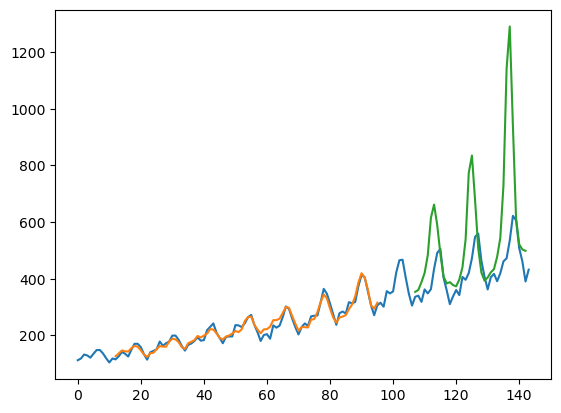

In [20]:
#shift train predictions for plottiing
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[n_steps:len(trainPredict)+n_steps, :] = trainPredict

#shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(n_steps*2)-1:len(dataset)-1, :] = testPredict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [21]:
test.shape

(48, 1)

In [22]:
x_input=test[36:]
x_input

array([[0.6042471 ],
       [0.554054  ],
       [0.60810804],
       [0.6891892 ],
       [0.71042466],
       [0.8320464 ],
       [1.        ],
       [0.96911204],
       [0.7799227 ],
       [0.6891892 ],
       [0.55212355],
       [0.6332046 ]], dtype=float32)

In [23]:
x_input = x_input.reshape(1,-1)

In [32]:
from keras.layers import LSTM, Input

future=model.predict(x_input)

1/1 [==============================] - 0s 30ms/step


In [33]:
scaler.inverse_transform(future)

array([[416.99997, 390.99997, 418.99997, 461.     , 471.99997, 535.     ,
        622.     , 606.     , 507.99997, 461.     , 390.     , 431.99997]],
      dtype=float32)

In [39]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [42]:
lst_output = []

i = 0
while(i<n_steps):
    
    if(len(temp_input)>n_steps):
        x_input = np.array(temp_input[1:])
        print("{} month output {}".format(i, yhat))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input,verbose=0)
        print("{} month output []".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1
print(lst_output)      

ValueError: cannot reshape array of size 1 into shape (1,12,1)

In [36]:
print("Array size:", x_input.size)

Array size: 1


In [37]:
x_input = x_input.reshape((1, n_steps, 1))

ValueError: cannot reshape array of size 1 into shape (1,12,1)

In [41]:
i = 0
while i < n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        print("Month {} input: {}".format(i, x_input))

        # Check if the size is sufficient for reshaping
        if x_input.size >= n_steps:
            x_input = x_input[:n_steps]  # Trim to n_steps elements if necessary
            x_input = x_input.reshape((1, n_steps, 1))
            yhat = model.predict(x_input, verbose=0)
            print("Month {} output: {}".format(i, yhat[0]))
        else:
            print("Insufficient data for reshaping.")
            # Handle this case based on your requirements

        temp_input.append(yhat[0])
        i = i + 1
    else:
        # Handle the case when len(temp_input) <= n_steps
        print("Not enough data for prediction.")
        break


Not enough data for prediction.


In [43]:
lst_output = []

i = 0
while i < n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        print("{} month input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i, yhat[0]))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.append(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i, yhat[0]))
        temp_input.extend(yhat[0].tolist())
        lst_output.append(yhat.tolist())
        i += 1

print(lst_output)


ValueError: cannot reshape array of size 1 into shape (1,12,1)

In [44]:
lst_output = []

i = 0
while i < n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        print("{} month input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i, yhat[0]))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.append(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, len(temp_input), 1))  # Adjust the shape based on the length of temp_input
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i, yhat[0]))
        temp_input.extend(yhat[0].tolist())
        i += 1

print(lst_output)


0 month output [[0.6042471]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.